# **Classification Task: *Breast Cancer Classification***

#### This project focuses on building a machine learning classifier to distinguish between benign and malignant breast masses. I have utilized the classic ***Breast Cancer Wisconsin (Diagnostic) Data Set*** to perform a binary classification, a critical task for aiding in early and accurate cancer diagnosis.

## **Step 1: Import Libraries**
#### *The basic libraries that are required for data analysis and machine learning.*

In [230]:
import pandas as pd              # for handling data
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns
#import sklearn                   # scikit-learn library (machine learning tools)
from sklearn.model_selection import train_test_split # split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  # machine learning algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve,
                             ConfusionMatrixDisplay, auc)

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')       # Set style for better visualization

## **Step 2: Load and Check Data**
#### *Load the dataset and look at the first few rows to understand the structure.*

In [231]:
classify = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [232]:
# drop duplicate id column if present
if 'id' in classify.columns:
    classify = classify.drop('id', axis=1)
if 'Unnamed: 32' in classify.columns:
    classify = classify.drop(columns=['Unnamed: 32'], errors='ignore')

print("\nTarget value counts:")
display(classify['diagnosis'].value_counts())


Target value counts:


diagnosis
B    357
M    212
Name: count, dtype: int64

In [233]:
classify.info() #complete information  of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [234]:
classify.head() #first 5 rows of the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [235]:
classify.tail() #last 5 rows of the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [236]:
classify.shape #number of rows & coloumns of the dataset

(569, 31)

In [237]:
classify.describe() #statistical summary of numerical columns

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **Step 3: Split the data into Training and Testing Sets**
#### *We separate the features (X) and the target (y).*
#### *- Encode target (M=malignant, B=benign)*  
#### *- Check missing values*
#### *- Create feature matrix X and target y*

In [238]:
# Encode diagnosis to 0/1: B=0, M=1
classify['target'] = classify['diagnosis'].map({'B':0, 'M':1})

# Drop original diagnosis column
classify = classify.drop('diagnosis', axis=1)

# Check missing
print("Missing values per column:\n", classify.isnull().sum().sort_values(ascending=False).head())

# Prepare X,y
X = classify.drop('target', axis=1)
y = classify['target']

print("Features:", X.shape[1])
print("Rows:", X.shape[0])

Missing values per column:
 radius_mean                0
concavity_se               0
fractal_dimension_worst    0
symmetry_worst             0
concave points_worst       0
dtype: int64
Features: 30
Rows: 569


### **Split into 80% training and 20% testing data**

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y)

In [240]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train shape: (455, 30) Test shape: (114, 30)
Train class distribution:
 target
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Test class distribution:
 target
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [241]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [242]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

## **Step 4: Train - Model 1: *Logistic Regression***
#### *We create the model and fit it (train it) on the training data.*

In [243]:
model_log = LogisticRegression(max_iter=1000)  # max_iter=1000 ensures the model converges
model_log.fit(X_train.fillna(0), y_train)

LogisticRegression(max_iter=1000)

## **Step 5: Make Predictions - Model 1: *Logistic Regression***
#### *Use the trained model to predict on the test set.*

In [244]:
y_pred_log = model_log.predict(X_test.fillna(0))

y_prob_log = model_log.predict_proba(X_test.fillna(0))[:, 1]  # for ROC/AUC

## **Step 6: Evaluate Model - Model 1: *Logistic Regression*** 
#### *Accuracy shows how many predictions were correct.*
#### *The confusion matrix shows how many true/false predictions were made.*

In [245]:
accuracy_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

In [246]:
print("Accuracy of the model:", round(accuracy_log, 3))
print("\nConfusion Matrix:")
print(cm_log)

Accuracy of the model: 0.939

Confusion Matrix:
[[71  1]
 [ 6 36]]


## **Step 7: Display Classification Report - Model 1: *Logistic Regression***
#### *Evaluate the Logistic Regression model performance with precision, recall, f1-score for each class.*

In [247]:
print("\nClassification Report:")    # Printing detailed evaluation metrics
print(classification_report(y_test, y_pred_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## **Step 8: Visualize - Model 1: *Logistic Regression***

## -------- 8.1. *Confusion Matrix*
#### *Heatmap helps understand prediction correctness visually.*

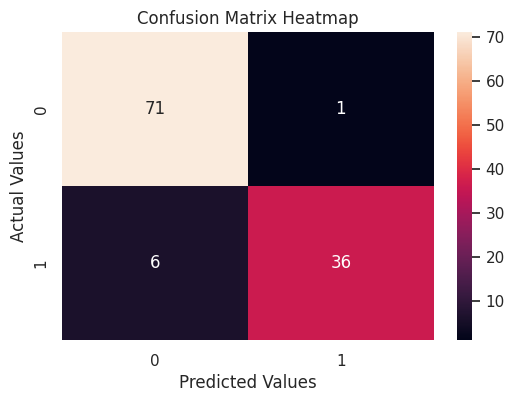

In [248]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## -------- 8.2. *ROC Curve*
#### *Visualize trade-off between True Positive Rate and False Positive Rate*

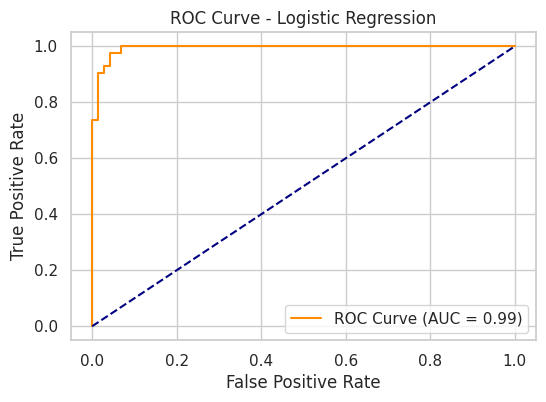

In [249]:
y_prob_log = model_log.predict_proba(X_test.fillna(0))[:,1]  # probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## -------- 8.3. *Precision-Recall Curve*
#### *Visualize trade-off between Precision and Recall*

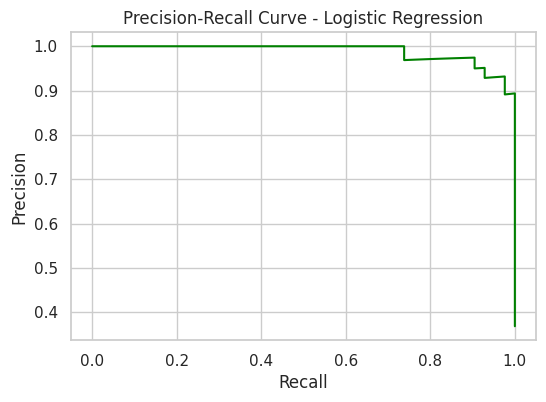

In [250]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_log)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## **Step 9: Compare Training vs Testing Score - Model 1: *Logistic Regression***
#### *Check how well the Logistic Regression model generalizes on unseen data.*
#### *(Check if the model is overfitting or underfitting.)*

In [251]:
train_score = model_log.score(X_train.fillna(0), y_train)
test_score = model_log.score(X_test.fillna(0), y_test)

print("Training Accuracy:", round(train_score, 3))
print("Testing Accuracy:", round(test_score, 3))

Training Accuracy: 0.96
Testing Accuracy: 0.939


## **Step 10: Train - Model 2: *Random Forest Classifier***
#### *Random Forest does not strictly require scaling; we fit and compute probabilities for ROC.*

In [252]:
# Initialize the Random Forest Classifier
model_ran = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
model_ran.fit(X_train.fillna(0), y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

## **Step 11: Make Predictions - Model 2: *Random Forest Classifier***

In [253]:
y_pred_ran = model_ran.predict(X_test.fillna(0))

## **Step 12: Evaluate Model - Model 2: *Random Forest Classifier*** 

In [254]:
# Calculate accuracy
accuracy_ran = accuracy_score(y_test, y_pred_ran)

# Generate confusion matrix
cm_ran = confusion_matrix(y_test, y_pred_ran)

# Print evaluation metrics
print("Random Forest Model Accuracy:", round(accuracy_ran, 3))
print("\nConfusion Matrix:")
print(cm_ran)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ran))

Random Forest Model Accuracy: 0.965

Confusion Matrix:
[[72  0]
 [ 4 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## **Step 13: Display Classification Report - Model 2: *Random Forest Classifier***
#### *Evaluate the Random Forest model performance with precision, recall, f1-score for each class.*

In [255]:
print("\nClassification Report:")    # Printing detailed evaluation metrics
print(classification_report(y_test, y_pred_ran))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## **Step 14: Visualize - Model 2: *Random Forest Classifier***

## -------- 14.1. *Confusion Matrix*
#### *Heatmap helps understand prediction correctness visually.*

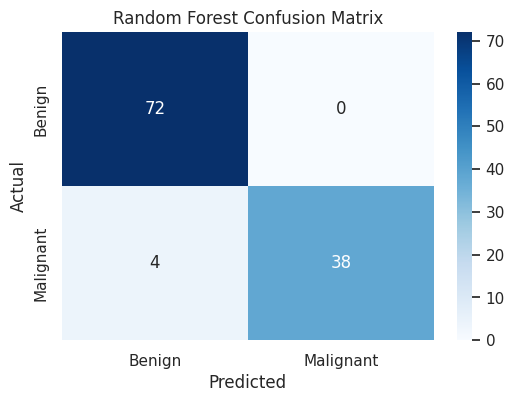

In [256]:
# confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_ran, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## -------- 14.2. *ROC Curve*
#### *Visualize trade-off between True Positive Rate and False Positive Rate*

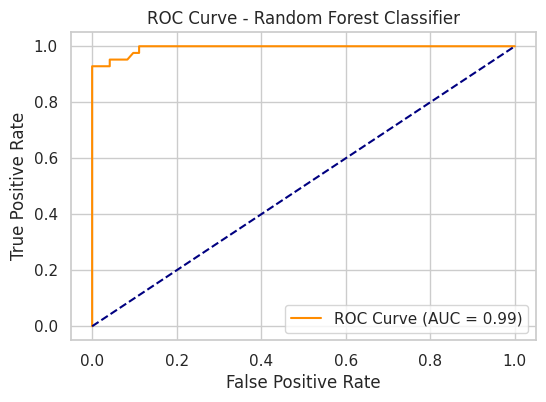

In [257]:
y_prob_ran = model_ran.predict_proba(X_test.fillna(0))[:,1]  # probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ran)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## -------- 14.3. *Precision-Recall Curve*
#### *Visualize trade-off between Precision and Recall*

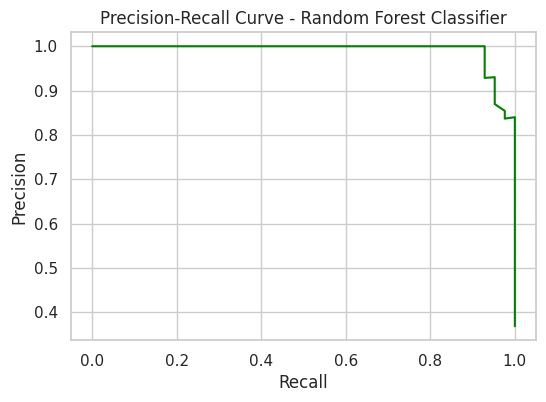

In [258]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_ran)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## **Step 15: Compare Training vs Testing Score - Model 2: *Random Forest Classifier***
#### *Check how well the Random Forest model generalizes on unseen data.*
#### *(Check if the model is overfitting or underfitting.)*

In [259]:
train_score = model_ran.score(X_train.fillna(0), y_train)
test_score = model_ran.score(X_test.fillna(0), y_test)

print("Training Accuracy:", round(train_score, 3))
print("Testing Accuracy:", round(test_score, 3))

Training Accuracy: 1.0
Testing Accuracy: 0.965


## **Step 16: Compare Model Performance**

## -------- 16.1. *Accuracy*

In [260]:
# Compare accuracies
print("Logistic Regression Accuracy:", round(accuracy_log, 3))
print("Random Forest Accuracy:", round(accuracy_ran, 3))

Logistic Regression Accuracy: 0.939
Random Forest Accuracy: 0.965


## -------- 16.2. *Horizontal Bar Plot for Accuracy*

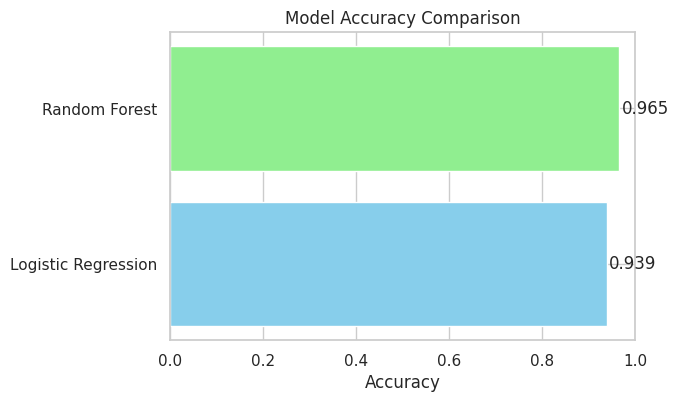

In [261]:
plt.figure(figsize=(6,4))

# Horizontal bar plot
plt.barh(models, accuracies, color=['skyblue', 'lightgreen'])
plt.xlim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.005, i, str(round(acc,3)), va='center')  # annotate bars with accuracy
plt.show()

## **Summary**
*300-500 words of all the code, including dataset description, preprocessing, model implementation, results, and interpretation*

In this exercise, I aimed to develop machine learning models to predict whether a tumor is benign or malignant using the **Wisconsin Diagnostic Breast Cancer (WDBC) dataset**. This dataset contains **569 instances** with **30 numerical features** extracted from digitized images of fine needle aspirates (FNA) of breast masses. These features describe various characteristics of cell nuclei, and the target variable indicates whether each tumor is benign (0) or malignant (1).

I began by loading the dataset into a pandas DataFrame and exploring its structure using *.info()*, *.head()*, *.tail()*, and *.describe()*. This exploration confirmed that all features were numeric and that there were no missing values, making the dataset ready for machine learning without the need for imputation. I then separated the features (*X*) from the target variable (*y*) and split the dataset into training and testing sets using an 80:20 ratio to evaluate model performance on unseen data.

For model implementation, I first applied **Logistic Regression**, a fundamental algorithm for binary classification tasks. After training the model on the training data, I generated predictions on the test set and evaluated performance using **accuracy**, **confusion matrix**, and additional visualizations including **ROC** and **Precision-Recall curves**. The model achieved high accuracy, and the confusion matrix revealed how well it classified benign and malignant tumors. The ROC and Precision-Recall curves further illustrated the model’s ability to balance true positives and false positives.

To enhance performance and compare results, I implemented a **Random Forest Classifier**, an ensemble learning method that constructs multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. After training on the same dataset, the Random Forest model produced predictions that were slightly more accurate than Logistic Regression. I evaluated this model using **accuracy**, **classification report**, **confusion matrix*, and **training vs. testing scores** to check generalization. These evaluations confirmed that Random Forest effectively distinguished between benign and malignant tumors, slightly outperforming Logistic Regression in overall predictive power.

Throughout the process, I visualized the results using **heatmaps**, **ROC curves**, and **Precision-Recall curves**, which provided intuitive insights into the models’ performance. By comparing Logistic Regression and Random Forest, I observed that while Logistic Regression offers simplicity and interpretability, Random Forest’s ensemble approach provided stronger predictive power and robustness.

In conclusion, this exercise allowed me to practice the full machine learning pipeline, including data inspection, preprocessing, model selection, training, evaluation, and visualization. Both models demonstrated strong performance on the WDBC dataset, with Random Forest slightly outperforming Logistic Regression. The additional visualizations helped communicate model behavior and supported a deeper understanding of classification evaluation metrics. This task reinforced my knowledge of supervised classification, model evaluation, and the importance of using multiple metrics and plots to interpret real-world datasets.